In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [59]:
# kyf_enriched = pd.read_excel('kyf_enriched.xls', encoding='xlrd', parse_dates=['Year'], \
#                              converters={'state_fips':str,'county_fips':str})
# kyf_enriched.head(1)

kyf_enriched = pd.read_csv('KYF2_new_compass_data_2015_geocodio_dad527759d1c56e361e09b4e110bd27d2e65a8f1.csv', 
                           na_values="No Data", skipfooter=2, parse_dates=['Year'], engine='python', converters={'County FIPS': str}, )

In [80]:
kyf_enriched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 55 columns):
Title                                4185 non-null object
Name                                 4185 non-null object
Abbreviati                           4185 non-null object
Year                                 4185 non-null datetime64[ns]
Address                              4185 non-null object
State                                4185 non-null object
Town                                 4185 non-null object
Zip                                  4185 non-null object
Agency                               4185 non-null object
Mission_Ar                           4185 non-null object
Recipient                            4185 non-null object
Recipient_                           4185 non-null object
Funding                              4176 non-null float64
Funding_Ty                           4185 non-null object
Description                          4185 non-null object
Topic_A       

In [61]:
urban_rural = pd.read_excel('ruralurbancodes2013.xls', converters={'FIPS': str}, encoding='xlrd')
urban_rural.head()

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,01001,AL,Autauga County,54571,2,"Metro - Counties in metro areas of 250,000 to ..."
1,01003,AL,Baldwin County,182265,3,Metro - Counties in metro areas of fewer than ...
2,01005,AL,Barbour County,27457,6,"Nonmetro - Urban population of 2,500 to 19,999..."
3,01007,AL,Bibb County,22915,1,Metro - Counties in metro areas of 1 million p...
4,01009,AL,Blount County,57322,1,Metro - Counties in metro areas of 1 million p...


In [75]:
kyf_enriched['County FIPS'].str.pad(5, side='left', fillchar='0')
kyf_enr_urban_rural = pd.merge(kyf_enriched, rural_urban, left_on='County FIPS', right_on='FIPS')
kyf_enr_urban_rural.head()

,Title,Name,Abbreviati,Year,Address,State_x,Town,Zip,Agency,Mission_Ar,...,Census Block Group,State Legislative District House,State Legislative District Senate,Congressional District,FIPS,State_y,County_Name,Population_2010,RUCC_2013,Description_y
0,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2009-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,1.0,State House District 20,State Senate District J,AK0,02020,AK,Anchorage Municipality,291826,2,"Metro - Counties in metro areas of 250,000 to ..."
1,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2010-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,1.0,State House District 20,State Senate District J,AK0,02020,AK,Anchorage Municipality,291826,2,"Metro - Counties in metro areas of 250,000 to ..."
2,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2011-01-01,"99508, Anchorage, AK",AK,Anchorage,99508,RBCS,Rural Development,...,2.0,State House District 19,State Senate District J,AK0,02020,AK,Anchorage Municipality,291826,2,"Metro - Counties in metro areas of 250,000 to ..."
3,Bright Beginnings,CACFP Wellness Grants,CACFP,2012-01-01,1000 Sundown Court,AK,Anchorage,99515,FNS,"Food, Nutrition and Consumer Services",...,3.0,State House District 26,State Senate District M,AK0,02020,AK,Anchorage Municipality,291826,2,"Metro - Counties in metro areas of 250,000 to ..."
4,ChefDays Farmers Market Project,Specialty Crop Block Grants,SCBG,2012-01-01,"99501, Anchorage, AK",AK,Anchorage,99501,AMS,Marketing and Regulatory Programs,...,2.0,State House District 20,State Senate District J,AK0,02020,AK,Anchorage Municipality,291826,2,"Metro - Counties in metro areas of 250,000 to ..."


In [76]:
kyf_enr_urban_rural['rural'] = kyf_enr_urban_rural['RUCC_2013'].apply(lambda x: 1.0 if x >= 7 else 0.)

In [78]:
kyf_enr_urban_rural[['Funding','rural']].corr()

,Funding,rural
Funding,1.000000,-0.015098
rural,-0.015098,1.000000


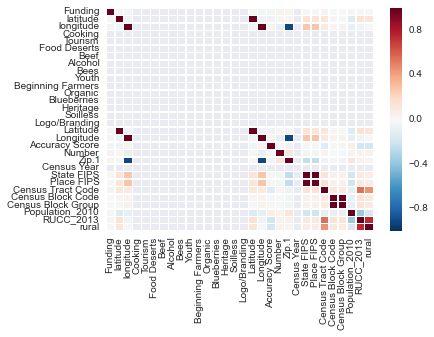

In [64]:
corr = kyf_enr_urban_rural.corr()
sns.heatmap(corr, linewidths= 0.25)

flag for majority white, majority black, under 50% majority minority

In [66]:
# median_inc=pd.read_clipboard()
# %store median_inc

In [67]:
print len(median_inc)
median_inc.head()

3142


,cty_fips,Geography,num_households,median_income
0,1001,"Autauga County, Alabama",20304,52475
1,1003,"Baldwin County, Alabama",73058,50183
2,1005,"Barbour County, Alabama",9145,35634
3,1007,"Bibb County, Alabama",7078,37984
4,1009,"Blount County, Alabama",20934,44409


In [68]:
# county_race = pd.read_clipboard()
# %store county_race
print len(county_race)
county_race.head()

2833


,Id2,Geography,pop_total,pop_pct_white,pop_pct_afam
0,1001,"Autauga County, Alabama",55263.0,77.4,18.7
1,1003,"Baldwin County, Alabama",190981.0,86.4,9.6
2,1005,"Barbour County, Alabama",27203.0,47.4,46.8
3,1007,"Bibb County, Alabama",22648.0,76.7,21.4
4,1009,"Blount County, Alabama",57807.0,95.1,1.5


In [69]:
demographics = pd.merge(left=median_inc, right=county_race, left_on='cty_fips', right_on='Id2', how='left',right_index=False)


In [90]:
demographics['cty_fips_p'] = demographics['cty_fips'].apply(str).str.pad(5, side='left',fillchar='0')

demographics['cty_fips_p']

0       01001
1       01003
2       01005
3       01007
4       01009
5       01011
6       01013
7       01015
8       01017
9       01019
10      01021
11      01023
12      01025
13      01027
14      01029
15      01031
16      01033
17      01035
18      01037
19      01039
20      01041
21      01043
22      01045
23      01047
24      01049
25      01051
26      01053
27      01055
28      01057
29      01059
        ...  
3112    55129
3113    55131
3114    55133
3115    55135
3116    55137
3117    55139
3118    55141
3119    56001
3120    56003
3121    56005
3122    56007
3123    56009
3124    56011
3125    56013
3126    56015
3127    56017
3128    56019
3129    56021
3130    56023
3131    56025
3132    56027
3133    56029
3134    56031
3135    56033
3136    56035
3137    56037
3138    56039
3139    56041
3140    56043
3141    56045
Name: cty_fips_p, Length: 3142, dtype: object

In [94]:
kyf_enr_rural_urban.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4135 entries, 0 to 4134
Data columns (total 54 columns):
Title                     4135 non-null object
Name                      4135 non-null object
Abbreviati                4135 non-null object
Year                      4135 non-null datetime64[ns]
Address                   4135 non-null object
State_x                   4135 non-null object
Town                      4135 non-null object
Zip                       4135 non-null object
Agency                    4135 non-null object
Mission_Ar                4135 non-null object
Recipient                 4135 non-null object
Recipient_                4135 non-null object
Funding                   4135 non-null float64
Funding_Ty                4135 non-null object
Description_x             4135 non-null object
Topic_A                   4135 non-null object
Topic_B                   4135 non-null object
Topic_C                   3996 non-null object
More_infor                4135 non-nul

In [95]:
kyf_demographics = pd.merge(left=kyf_enr_rural_urban, right=demographics, left_on='county_fips', right_on = 'cty_fips_p', how='left') 

In [96]:
kyf_demographics

,Title,Name,Abbreviati,Year,Address,State_x,Town,Zip,Agency,Mission_Ar,...,cty_fips,Geography_x,num_households,median_income,Id2,Geography_y,pop_total,pop_pct_white,pop_pct_afam,cty_fips_p
0,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2009-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,2020.0,"Anchorage Municipality, Alaska",105164.0,78121.0,2020.0,"Anchorage Municipality, Alaska",21491.0,64.9,5.9,02020
1,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2010-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,2020.0,"Anchorage Municipality, Alaska",105164.0,78121.0,2020.0,"Anchorage Municipality, Alaska",21491.0,64.9,5.9,02020
2,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2011-01-01,"99508, Anchorage, AK",AK,Anchorage,99508,RBCS,Rural Development,...,2020.0,"Anchorage Municipality, Alaska",105164.0,78121.0,2020.0,"Anchorage Municipality, Alaska",21491.0,64.9,5.9,02020
3,Bright Beginnings,CACFP Wellness Grants,CACFP,2012-01-01,1000 Sundown Court,AK,Anchorage,99515,FNS,"Food, Nutrition and Consumer Services",...,2020.0,"Anchorage Municipality, Alaska",105164.0,78121.0,2020.0,"Anchorage Municipality, Alaska",21491.0,64.9,5.9,02020
4,ChefDays Farmers Market Project,Specialty Crop Block Grants,SCBG,2012-01-01,"99501, Anchorage, AK",AK,Anchorage,99501,AMS,Marketing and Regulatory Programs,...,2020.0,"Anchorage Municipality, Alaska",105164.0,78121.0,2020.0,"Anchorage Municipality, Alaska",21491.0,64.9,5.9,02020
5,Develop Local Food Business Enterprise for Tyo...,Local Food Promotion Program,LFPP,2014-01-01,1689 C Street,AK,Anchorage,99501,AMS,Marketing and Regulatory Programs,...,2020.0,"Anchorage Municipality, Alaska",105164.0,78121.0,2020.0,"Anchorage Municipality, Alaska",21491.0,64.9,5.9,02020
6,Farm to School Potato Project,Specialty Crop Block Grants,SCBG,2012-01-01,"99501, Anchorage, AK",AK,Anchorage,99501,AMS,Marketing and Regulatory Programs,...,2020.0,"Anchorage Municipality, Alaska",105164.0,78121.0,2020.0,"Anchorage Municipality, Alaska",21491.0,64.9,5.9,02020
7,Hillcrest Children's Center,CACFP Wellness Grants,CACFP,2012-01-01,900 Hollywood Drive,AK,Anchorage,99501,FNS,"Food, Nutrition and Consumer Services",...,2020.0,"Anchorage Municipality, Alaska",105164.0,78121.0,2020.0,"Anchorage Municipality, Alaska",21491.0,64.9,5.9,02020
8,Increase Public Awareness of Locally Grown Crops,Specialty Crop Block Grants,SCBG,2012-01-01,"99501, Anchorage, AK",AK,Anchorage,99501,AMS,Marketing and Regulatory Programs,...,2020.0,"Anchorage Municipality, Alaska",105164.0,78121.0,2020.0,"Anchorage Municipality, Alaska",21491.0,64.9,5.9,02020
9,Joint Base Elmendorf-Richardson,CACFP Wellness Grants,CACFP,2012-01-01,673 FSS/FSFF,AK,JBER,99505,FNS,"Food, Nutrition and Consumer Services",...,2020.0,"Anchorage Municipality, Alaska",105164.0,78121.0,2020.0,"Anchorage Municipality, Alaska",21491.0,64.9,5.9,02020


In [100]:
kyf_demographics.corr()

,Funding,lon,lat,Cooking,Tourism,Food Deserts,Beef,Alcohol,Bees,Youth,...,place_fips,Population_2010,RUCC_2013,cty_fips,num_households,median_income,Id2,pop_total,pop_pct_white,pop_pct_afam
Funding,1.000000,-0.026820,0.009943,-0.028759,-0.013802,0.024001,0.009237,0.001579,-0.010823,-0.035920,...,0.007467,-0.011456,0.006037,0.005590,-0.011535,-0.002454,0.005801,0.007974,0.012923,-0.018745
lon,-0.026820,1.000000,-0.095639,-0.027889,-0.015216,0.020357,0.002757,0.010458,0.003655,-0.031358,...,0.248522,-0.091978,-0.035458,0.235963,-0.078462,-0.070662,0.232339,-0.002943,0.111455,0.270283
lat,0.009943,-0.095639,1.000000,-0.021191,0.004269,-0.037773,0.012120,0.023408,-0.027311,-0.042494,...,0.128180,-0.133106,0.114203,0.171540,-0.127620,0.195663,0.180788,-0.035541,0.421056,-0.320226
Cooking,-0.028759,-0.027889,-0.021191,1.000000,0.056727,-0.016851,-0.028938,-0.037912,-0.015024,0.031671,...,0.003306,-0.020303,-0.007753,0.003923,-0.020697,-0.016700,0.006722,-0.027740,0.006582,-0.022525
Tourism,-0.013802,-0.015216,0.004269,0.056727,1.000000,-0.020354,-0.018002,0.030165,-0.009346,-0.004656,...,0.005787,-0.009979,-0.015368,0.008174,-0.008222,0.007391,0.007704,-0.001637,0.000097,-0.011734
Food Deserts,0.024001,0.020357,-0.037773,-0.016851,-0.020354,1.000000,-0.018339,-0.024027,-0.009521,-0.037929,...,-0.029904,-0.019066,0.008056,-0.029479,-0.019273,-0.026926,-0.028497,0.063413,-0.013365,0.044707
Beef,0.009237,0.002757,0.012120,-0.028938,-0.018002,-0.018339,1.000000,-0.021250,-0.008421,-0.047449,...,0.000939,-0.027047,0.015259,-0.001776,-0.027747,-0.014146,0.005063,0.014460,0.021567,-0.016566
Alcohol,0.001579,0.010458,0.023408,-0.037912,0.030165,-0.024027,-0.021250,1.000000,0.011596,-0.062164,...,0.013525,-0.025423,-0.009234,0.014828,-0.025017,0.030022,0.014306,-0.002907,0.010441,-0.001521
Bees,-0.010823,0.003655,-0.027311,-0.015024,-0.009346,-0.009521,-0.008421,0.011596,1.000000,-0.024635,...,-0.003897,-0.014152,-0.005166,-0.002975,-0.014221,-0.000524,-0.003236,-0.011800,-0.011674,0.011364
Youth,-0.035920,-0.031358,-0.042494,0.031671,-0.004656,-0.037929,-0.047449,-0.062164,-0.024635,1.000000,...,-0.048774,0.036529,-0.027778,-0.049552,0.035473,0.000472,-0.051941,-0.016428,-0.027006,0.023720


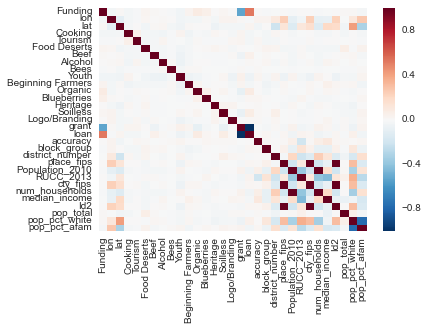

In [98]:
sns.heatmap(kyf_demographics.corr())

In [48]:
acs_13_3yr = pd.read_csv('ACS_13_3YR_S0201.csv')
acs_13_3yr

,GEO.id,GEO.id2,GEO.display-label,POPGROUP.id,POPGROUP.display-label,EST_VC03,MOE_VC03,EST_VC04,MOE_VC04,EST_VC05,...,EST_VC456,MOE_VC456,EST_VC457,MOE_VC457,EST_VC461,MOE_VC461,EST_VC462,MOE_VC462,EST_VC463,MOE_VC463
0,Id,Id2,Geography,Id,Population Group,Estimate; TOTAL NUMBER OF RACES REPORTED - Tot...,Margin of Error; TOTAL NUMBER OF RACES REPORTE...,Estimate; TOTAL NUMBER OF RACES REPORTED - Tot...,Margin of Error; TOTAL NUMBER OF RACES REPORTE...,Estimate; TOTAL NUMBER OF RACES REPORTED - Tot...,...,Estimate; GROSS RENT - Occupied units paying rent,Margin of Error; GROSS RENT - Occupied units p...,Estimate; GROSS RENT - Occupied units paying r...,Margin of Error; GROSS RENT - Occupied units p...,Estimate; COMPUTERS AND INTERNET USE - Total h...,Margin of Error; COMPUTERS AND INTERNET USE - ...,Estimate; COMPUTERS AND INTERNET USE - Total h...,Margin of Error; COMPUTERS AND INTERNET USE - ...,Estimate; COMPUTERS AND INTERNET USE - Total h...,Margin of Error; COMPUTERS AND INTERNET USE - ...
1,0500000US01073,01073,"Jefferson County, Alabama",001,Total population,658601,NaN,99.0,0.2,1.0,...,86927,2312,793,13,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01073,01073,"Jefferson County, Alabama",002,White alone,348342,1688,100.0,0.1,NaN,...,32527,1472,877,19,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01073,01073,"Jefferson County, Alabama",004,Black or African American alone,279024,893,100.0,0.1,NaN,...,50081,1678,733,13,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US04013,04013,"Maricopa County, Arizona",001,Total population,3939668,NaN,97.1,0.1,2.7,...,534725,6429,934,6,NaN,NaN,NaN,NaN,NaN,NaN
5,0500000US04013,04013,"Maricopa County, Arizona",002,White alone,3174535,9371,100.0,0.1,NaN,...,411688,5370,956,7,NaN,NaN,NaN,NaN,NaN,NaN
6,0500000US04013,04013,"Maricopa County, Arizona",004,Black or African American alone,204844,2840,100.0,0.1,NaN,...,48615,1884,871,15,NaN,NaN,NaN,NaN,NaN,NaN
7,0500000US04013,04013,"Maricopa County, Arizona",006,"American Indian and Alaska Native alone (300, ...",74427,2770,100.0,0.1,NaN,...,12382,1197,817,30,NaN,NaN,NaN,NaN,NaN,NaN
8,0500000US04013,04013,"Maricopa County, Arizona",012,Asian alone (400-499),142897,2388,100.0,0.1,NaN,...,18586,1333,965,27,NaN,NaN,NaN,NaN,NaN,NaN
9,0500000US04013,04013,"Maricopa County, Arizona",070,Some other race alone,221509,8582,100.0,0.1,NaN,...,30336,1471,833,19,NaN,NaN,NaN,NaN,NaN,NaN
